## Imports

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm

from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

In [2]:
from gcmap import GCMapper, Gradient

In [83]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
import matplotlib.colors as col

In [4]:
import qgrid  

In [5]:
path = '../data/'

In [6]:
df = pd.read_csv(path + 'flight_data_de.csv')

In [7]:
df.head()

,route,fr_country,fr_airport,to_country,to_airport,month,flight_d,seat_d,passenger_d
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0


In [8]:
qgrid.set_grid_option('maxVisibleRows', 12)

In [9]:
qgrid.show_grid(df.head(100))  # , grid_options={'forceFitColumns': False}, show_toolbar=True)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
df_geo = pd.read_csv(path + 'world_airports.csv')

In [11]:
df_geo.head()

,airport_id,name,city,country,iata,icao,latitude,longitude,altitude,timezone
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10


#### Add lat-long for fr_airport

In [12]:
df_2 = pd.merge(df, df_geo[['icao', 'latitude', 'longitude']], how='left', left_on='fr_airport', right_on='icao')

In [13]:
df_2.rename(columns={'latitude': 'fr_lat', 'longitude': 'fr_lng'}, inplace=True)

In [14]:
df_2.drop(columns='icao', inplace=True)

In [15]:
df_2.head()

,route,fr_country,fr_airport,to_country,to_airport,month,flight_d,seat_d,passenger_d,fr_lat,fr_lng
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,52.380001,13.5225
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,52.380001,13.5225
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,52.380001,13.5225
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,52.380001,13.5225
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,52.380001,13.5225


#### Add lat-long for to_airport

In [16]:
df_2 = pd.merge(df_2, df_geo[['icao', 'latitude', 'longitude']], how='left', left_on='to_airport', right_on='icao')

In [17]:
df_2.rename(columns={'latitude': 'to_lat', 'longitude': 'to_lng'}, inplace=True)

In [18]:
df_2.drop(columns='icao', inplace=True)

In [19]:
df_2.head()

,route,fr_country,fr_airport,to_country,to_airport,month,flight_d,seat_d,passenger_d,fr_lat,fr_lng,to_lat,to_lng
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,52.380001,13.5225,50.901402,4.484440
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,52.380001,13.5225,42.696693,23.411436
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,52.380001,13.5225,46.238098,6.108950
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,52.380001,13.5225,NaN,NaN
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,52.380001,13.5225,50.865898,7.142740


#### Create map

In [20]:
pd.to_datetime(df_2.month).dt.year

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
161006    2002
161007    2002
161008    2002
161009    2002
161010    2002
Name: month, Length: 161011, dtype: int64

In [21]:
df_map = df_2[pd.to_datetime(df_2.month).dt.year == 2018]

In [22]:
# df_map = df_2[]

In [23]:
grad = Gradient(((0, 0, 0, 0), (0.5, 204, 0, 153), (1, 255, 204, 230)))
# initialize GCMapper and set data
gcm = GCMapper(cols=grad, height=2000, width=4000)
gcm.set_data(df_map['fr_lng'], df_map['fr_lat'], df_map['to_lng'],
             df_map['to_lat'], df_map['flight_d'])
# run & save
img = gcm.draw()

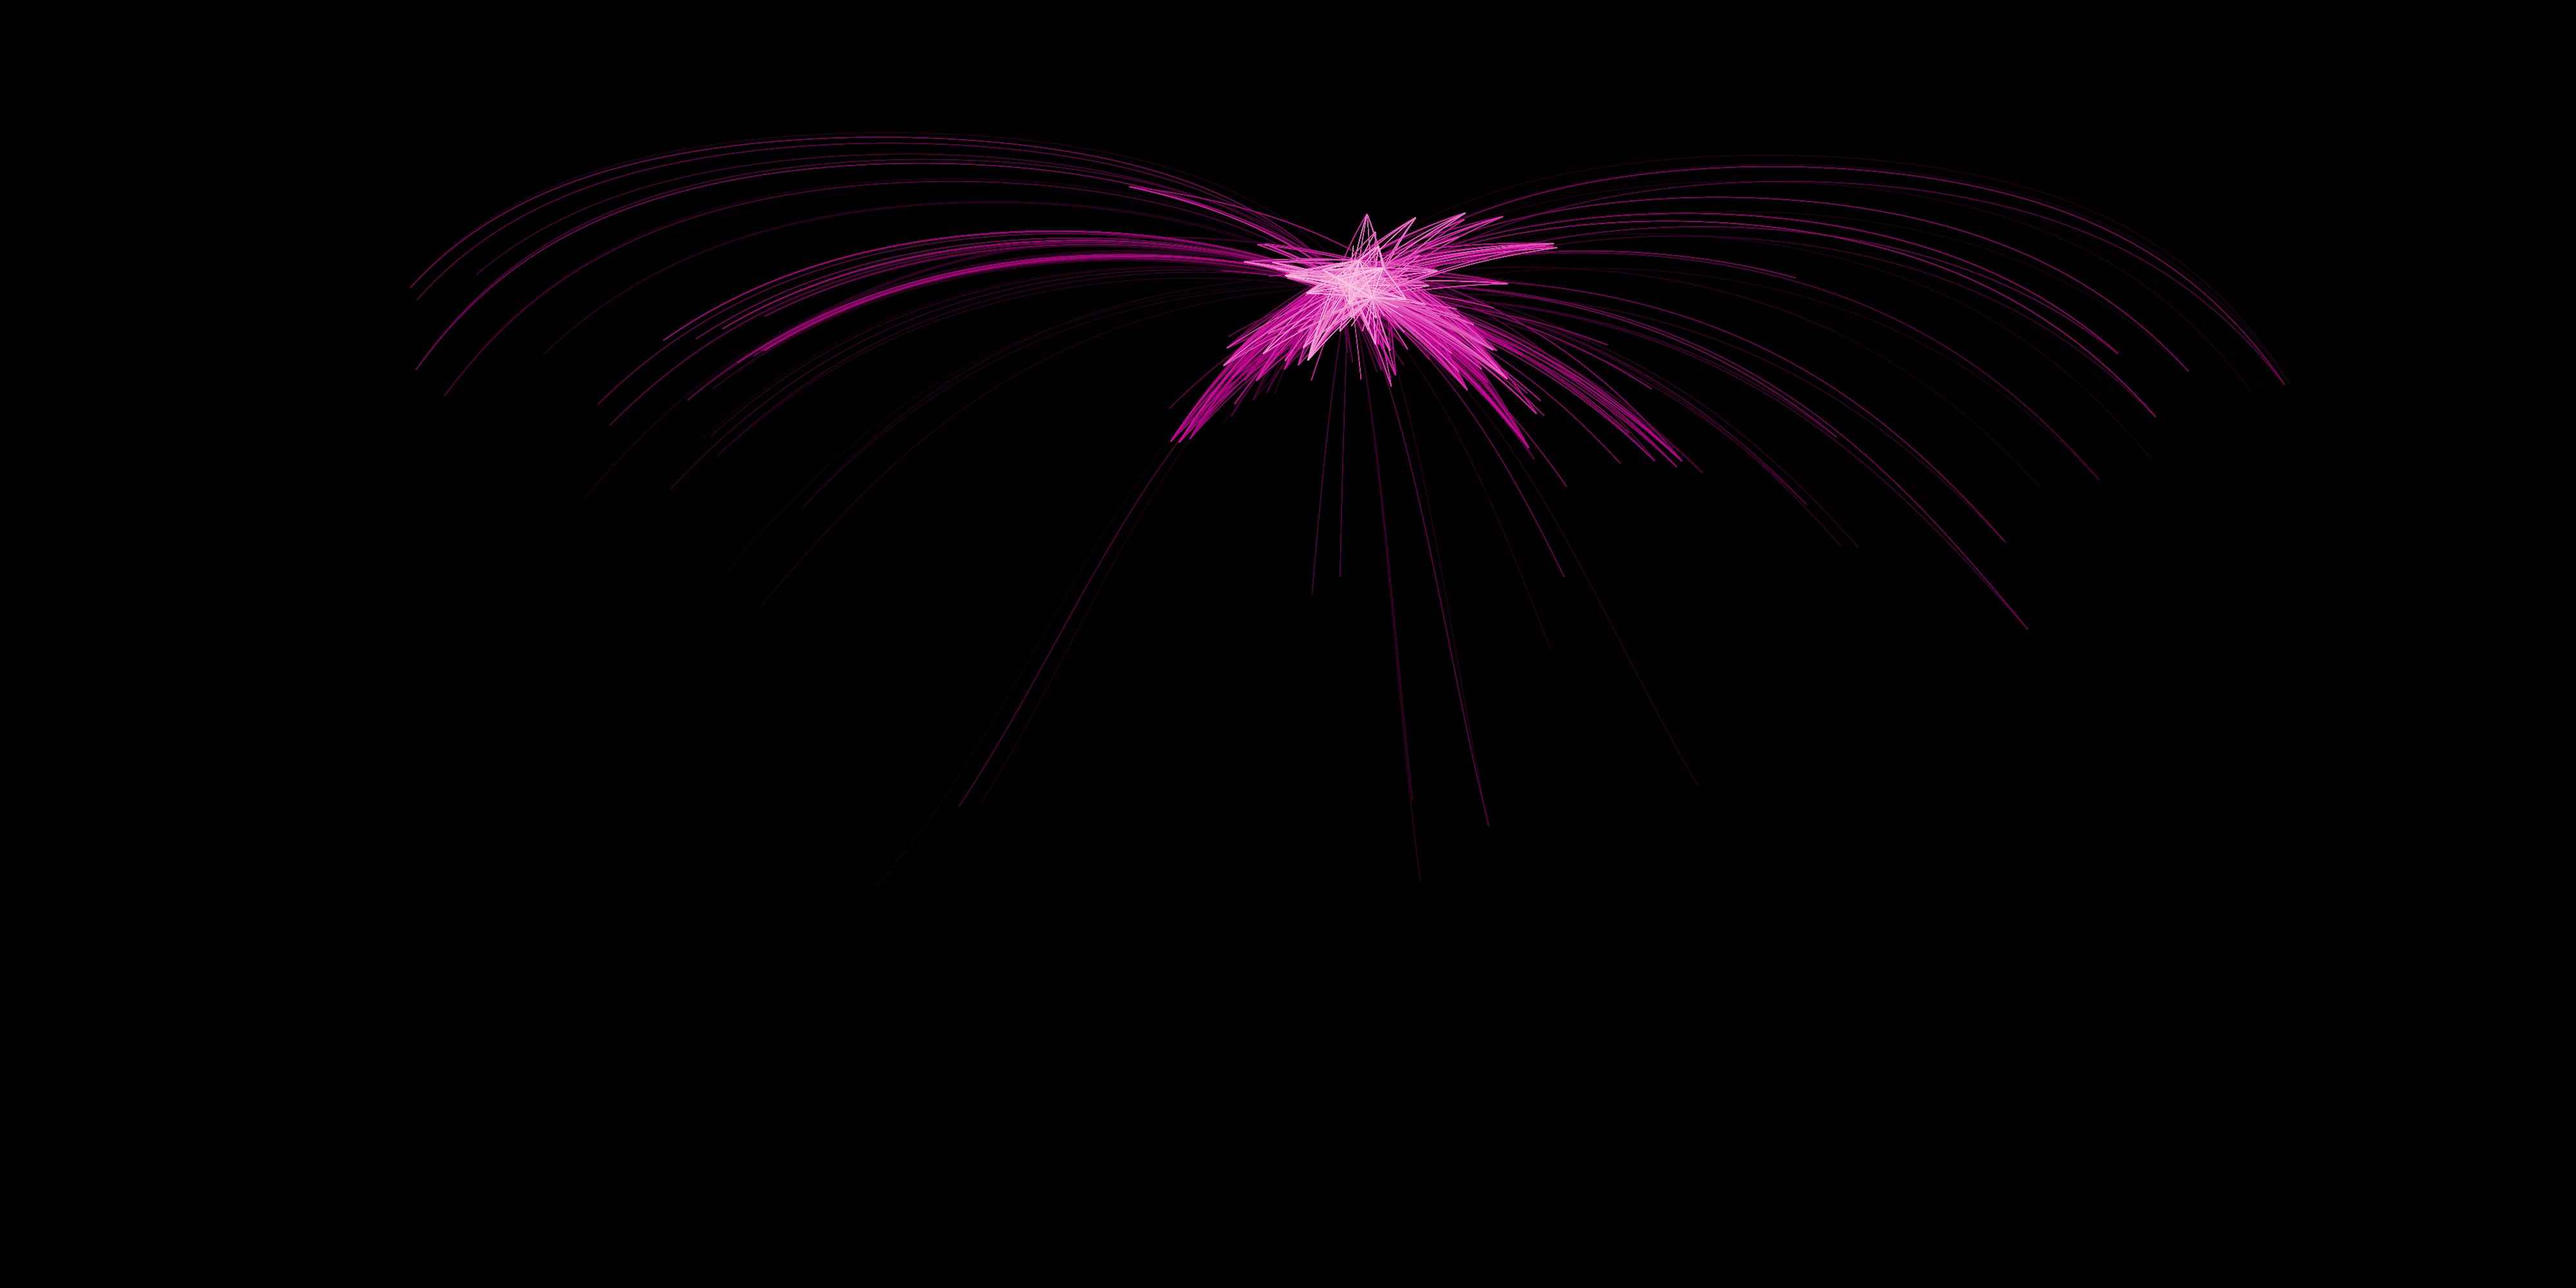

In [24]:
img

In [25]:
# if color_mode == 'screen':
#     bg_color = (0.0, 0.0, 0, 1.0)
#     coast_color = (204/255.0, 0, 153/255.0, 0.7)
#     color_list = [(0.0, 0.0, 0.0, 0.0),
#                   (204/255.0, 0, 153/255.0, 0.6),
#                   (255/255.0, 204/255.0, 230/255.0, 1.0)]
# else:
bg_color = (1.0, 1.0, 1.0, 1.0)
coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
color_list = [(1.0, 1.0, 1.0, 0.0),
              (255/255.0, 204/255.0, 230/255.0, 1.0),
              (204/255.0, 0, 153/255.0, 0.6)
              ]

/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


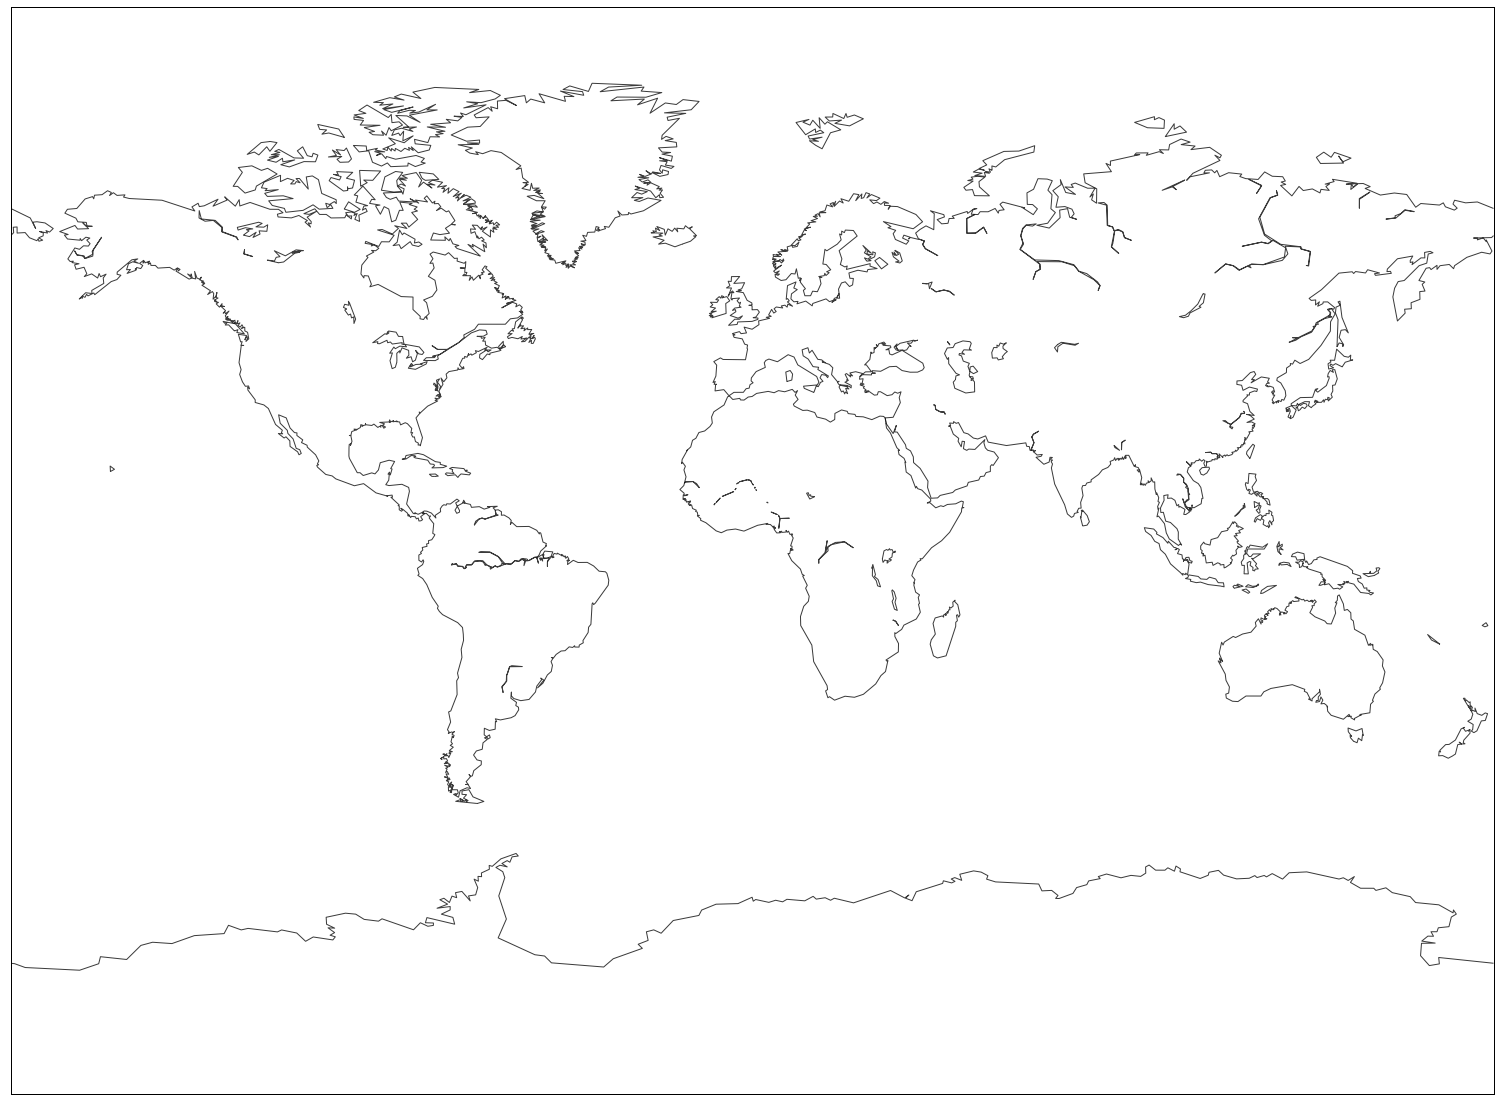

In [26]:
# create the map and draw country boundaries



plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=0)
m.drawcoastlines(color=coast_color, linewidth=1.0)
m.fillcontinents(color=bg_color, lake_color=bg_color)
m.drawmapboundary(fill_color=bg_color)

In [27]:
len(df_map.index)

10923

In [28]:
df_map = df_2[(pd.to_datetime(df_2.month).dt.year == 2018) & (pd.to_datetime(df_2.month).dt.month == 8)]

In [29]:
# df_map

In [30]:
df_map = df_map.dropna(subset=['to_lat'])

/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in greater


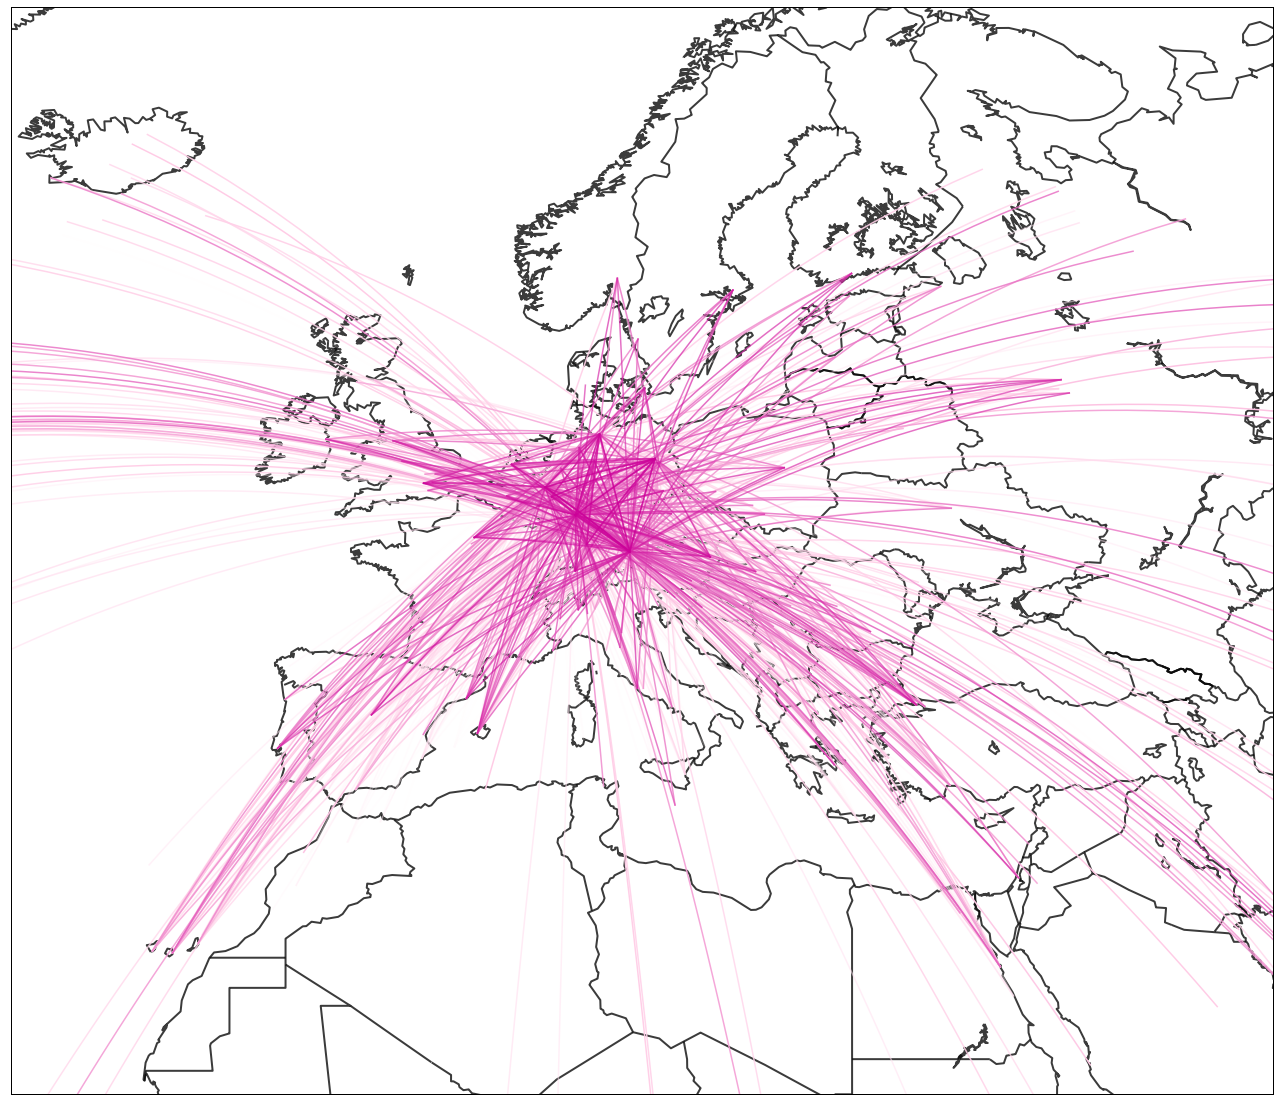

In [161]:
df_map = df_2[(pd.to_datetime(df_2.month).dt.year == 2018) & (pd.to_datetime(df_2.month).dt.month == 3)]
df_map = df_map.dropna(subset=['to_lat'])
# df_map = df_map.head(300)

# def plot_map(in_filename, color_mode='screen',
#              out_filename='flights_map_mpl.png', absolute=False):
#     """Plots the given CSV data files use matplotlib basemap and saves it to
#     a PNG file.
#     Args:
#         in_filename: Filename of the CSV containing the data points.
#         out_filename: Output image filename
#         color_mode: Use 'screen' if you intend to use the visualisation for
#                     on screen display. Use 'print' to save the visualisation
#                     with printer-friendly colors.
#         absolute: set to True if you want coloring to depend on your dataset
#                   parameter value (ie for comparison).
#                   When set to false, each coordinate pair gets a different
#                   color.
#     """

color_mode = 'xx' # 'screen'

if color_mode == 'screen':
    bg_color = (0.0, 0.0, 0, 1.0)
    coast_color = (204/255.0, 0, 153/255.0, 0.7)
    color_list = [(0.0, 0.0, 0.0, 0.0),
                  (204/255.0, 0, 153/255.0, 0.6),
                  (255/255.0, 204/255.0, 230/255.0, 1.0)]
else:
    bg_color = (1.0, 1.0, 1.0, 1.0)
    coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
    color_list = [(1.0, 1.0, 1.0, 0.0),
                  (255/255.0, 204/255.0, 230/255.0, 1.0),
                  (204/255.0, 0, 153/255.0, 0.6)
                  ]

num_routes = len(df_map.index)

# normalize the dataset for color scale
norm = PowerNorm(0.3, df_map['flight_d'].min(),
                 df_map['flight_d'].max())
# norm = Normalize(routes['nb_flights'].min(), routes['nb_flights'].max())

# create a linear color scale with enough colors

absolute = False

if absolute:
    n = df_map['flight_d'].max()
else:
    n = num_routes
cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,
                                         N=n)
# create the map and draw country boundaries
plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=5, lat_0=35, resolution='l')  # lat_0=10, lon_0=0, 
m.drawcoastlines(color=coast_color, linewidth=2.0)
m.drawcountries(color=coast_color, linewidth=2.0)
m.fillcontinents(color=bg_color, lake_color=bg_color)
m.drawmapboundary(fill_color=bg_color)

# plot each route with its color depending on the number of flights
for i, df_map in enumerate(df_map.sort_values(by='flight_d',
                          ascending=True).iterrows()):
    df_map = df_map[1]
    if absolute:
        color = cmap(norm(int(df_map['flight_d'])))
    else:
        color = cmap(i * 1.0 / num_routes)
        
    line, = m.drawgreatcircle(df_map['fr_lng'], df_map['fr_lat'],
                              df_map['to_lng'], df_map['to_lat'],
                              linewidth=1.5, color=color)
    # if the path wraps the image, basemap plots a nasty line connecting
    # the points at the opposite border of the map.
    # we thus detect path that are bigger than 30km and split them
    # by adding a NaN
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
        

        # your extent in lat/lon (dec degrees)

# upper left
ulx = -25
uly = 70
# lower right
lrx = 50
lry = 20

# transform coordinates to map projection
xmin, ymin = m(ulx, lry)
xmax, ymax = m(lrx, uly)

# set the axes limits
ax = plt.gca();
ax.set_xlim(xmin, xmax);
ax.set_ylim(ymin, ymax);

plt.savefig('../plots/map_europe_german_flights.png', format='png', bbox_inches='tight')

# save the map
# plt.savefig(out_filename, format='png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in greater


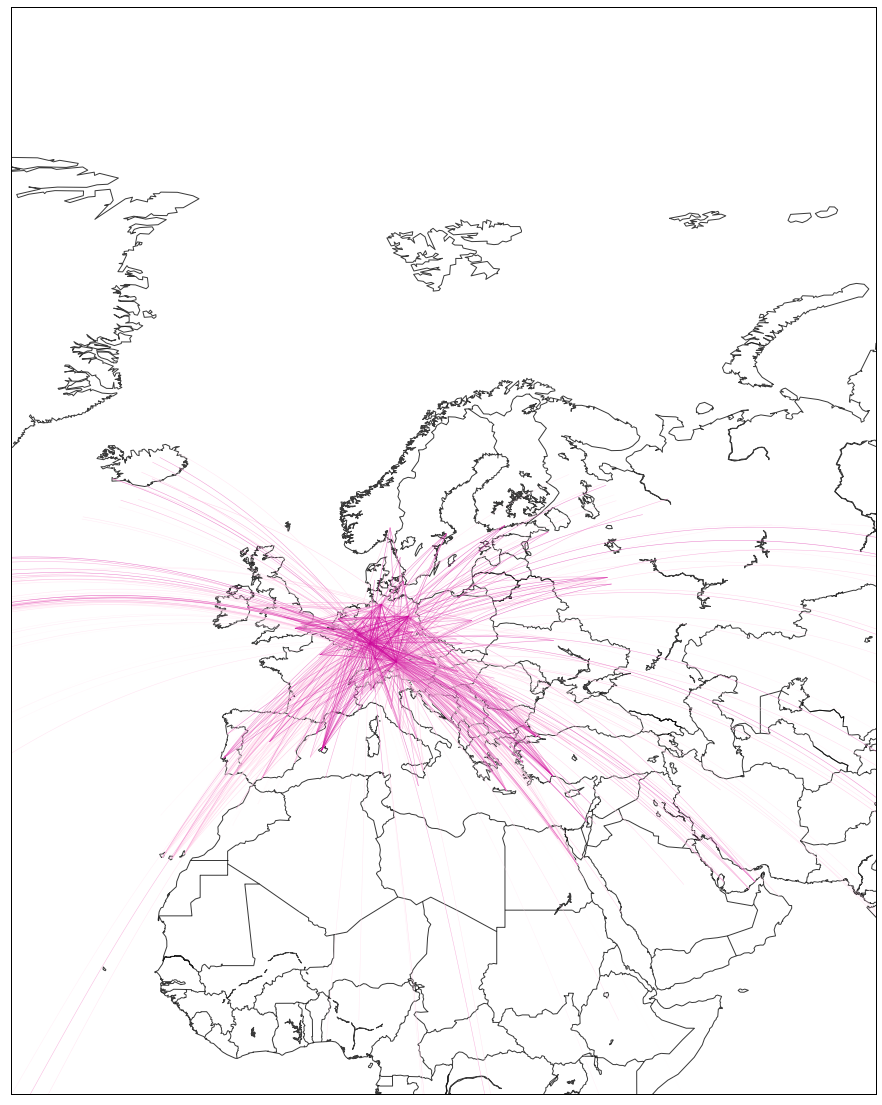

In [32]:
df_map = df_2[(pd.to_datetime(df_2.month).dt.year == 2018) & (pd.to_datetime(df_2.month).dt.month == 8)]
df_map = df_map.dropna(subset=['to_lat'])
# df_map = df_map.head(300)

# def plot_map(in_filename, color_mode='screen',
#              out_filename='flights_map_mpl.png', absolute=False):
#     """Plots the given CSV data files use matplotlib basemap and saves it to
#     a PNG file.
#     Args:
#         in_filename: Filename of the CSV containing the data points.
#         out_filename: Output image filename
#         color_mode: Use 'screen' if you intend to use the visualisation for
#                     on screen display. Use 'print' to save the visualisation
#                     with printer-friendly colors.
#         absolute: set to True if you want coloring to depend on your dataset
#                   parameter value (ie for comparison).
#                   When set to false, each coordinate pair gets a different
#                   color.
#     """

color_mode = 'xx' # 'screen'

if color_mode == 'screen':
    bg_color = (0.0, 0.0, 0, 1.0)
    coast_color = (204/255.0, 0, 153/255.0, 0.7)
    color_list = [(0.0, 0.0, 0.0, 0.0),
                  (204/255.0, 0, 153/255.0, 0.6),
                  (255/255.0, 204/255.0, 230/255.0, 1.0)]
else:
    bg_color = (1.0, 1.0, 1.0, 1.0)
    coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
    color_list = [(1.0, 1.0, 1.0, 0.0),
                  (255/255.0, 204/255.0, 230/255.0, 1.0),
                  (204/255.0, 0, 153/255.0, 0.6)
                  ]

num_routes = len(df_map.index)

# normalize the dataset for color scale
norm = PowerNorm(0.3, df_map['flight_d'].min(),
                 df_map['flight_d'].max())
# norm = Normalize(routes['nb_flights'].min(), routes['nb_flights'].max())

# create a linear color scale with enough colors

absolute = False

if absolute:
    n = df_map['flight_d'].max()
else:
    n = num_routes
cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,
                                         N=n)
# create the map and draw country boundaries
plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=5, lat_0=35, resolution='l')  # lat_0=10, lon_0=0, 
m.drawcoastlines(color=coast_color, linewidth=1.0)
m.drawcountries(color=coast_color, linewidth=1.0)
m.fillcontinents(color=bg_color, lake_color=bg_color)
m.drawmapboundary(fill_color=bg_color)

# plot each route with its color depending on the number of flights
for i, df_map in enumerate(df_map.sort_values(by='flight_d',
                          ascending=True).iterrows()):
    df_map = df_map[1]
    if absolute:
        color = cmap(norm(int(df_map['flight_d'])))
    else:
        color = cmap(i * 1.0 / num_routes)
        
    line, = m.drawgreatcircle(df_map['fr_lng'], df_map['fr_lat'],
                              df_map['to_lng'], df_map['to_lat'],
                              linewidth=0.5, color=color)
    # if the path wraps the image, basemap plots a nasty line connecting
    # the points at the opposite border of the map.
    # we thus detect path that are bigger than 30km and split them
    # by adding a NaN
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
        

        # your extent in lat/lon (dec degrees)
ulx = -35
uly = 90
lrx = 70
lry = 0

# transform coordinates to map projection
xmin, ymin = m(ulx, lry)
xmax, ymax = m(lrx, uly)

# set the axes limits
ax = plt.gca();
ax.set_xlim(xmin, xmax);
ax.set_ylim(ymin, ymax);

# save the map
# plt.savefig(out_filename, format='png', bbox_inches='tight')

## Map: Tegel vs. Schönefeld

In [34]:
# df_map = df_2[(pd.to_datetime(df_2.month).dt.year == 2018) & (pd.to_datetime(df_2.month).dt.month == 8)]


In [36]:
df_2.head()

,route,fr_country,fr_airport,to_country,to_airport,month,flight_d,seat_d,passenger_d,fr_lat,fr_lng,to_lat,to_lng
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,52.380001,13.5225,50.901402,4.484440
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,52.380001,13.5225,42.696693,23.411436
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,52.380001,13.5225,46.238098,6.108950
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,52.380001,13.5225,NaN,NaN
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,52.380001,13.5225,50.865898,7.142740


In [37]:
df_bln = df_2[(df['fr_airport'].isin(['EDDT', 'EDDB'])) | (df_2['to_airport'].isin(['EDDT', 'EDDB']))]

In [39]:
di_airports = {
    'EDDT': 'Berlin-Tegel',
    'EDDB': 'Berlin-Schönefeld',
}

In [42]:
df_bln = df_bln.assign(airport=np.NaN)
df_bln['airport'] = np.where(df_bln['airport'].isna(), df_bln['fr_airport'].map(di_airports), df_bln['airport'])
df_bln['airport'] = np.where(df_bln['airport'].isna(), df_bln['to_airport'].map(di_airports), df_bln['airport'])


In [56]:
df_bln.dropna()

,route,fr_country,fr_airport,to_country,to_airport,month,flight_d,seat_d,passenger_d,fr_lat,fr_lng,to_lat,to_lng,airport
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,52.380001,13.5225,50.901402,4.484440,Berlin-Schönefeld
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,52.380001,13.5225,42.696693,23.411436,Berlin-Schönefeld
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,52.380001,13.5225,46.238098,6.108950,Berlin-Schönefeld
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,52.380001,13.5225,50.865898,7.142740,Berlin-Schönefeld
5,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,52.380001,13.5225,55.617901,12.656000,Berlin-Schönefeld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160945,DE_EDDT_IT_LIMC,DE,EDDT,IT,LIMC,2002-01-01,0.0,5820.0,3026.0,52.559700,13.2877,45.630600,8.728110,Berlin-Tegel
160946,DE_EDDT_NL_EHAM,DE,EDDT,NL,EHAM,2002-01-01,0.0,11249.0,8407.0,52.559700,13.2877,52.308601,4.763890,Berlin-Tegel
160947,DE_EDDT_TR_LTAI,DE,EDDT,TR,LTAI,2002-01-01,0.0,2600.0,1408.0,52.559700,13.2877,36.898701,30.800501,Berlin-Tegel
160948,DE_EDDT_TR_LTBA,DE,EDDT,TR,LTBA,2002-01-01,0.0,7944.0,3933.0,52.559700,13.2877,40.976898,28.814600,Berlin-Tegel


In [43]:
df_bln.shape

(17587, 14)

In [49]:
df_bln.airport.value_counts()

Berlin-Tegel         9906
Berlin-Schönefeld    7681
Name: airport, dtype: int64

In [73]:
df_map = df_bln.dropna()
for i, df_map in enumerate(df_map.head(10).sort_values(by='flight_d',
                          ascending=True).iterrows()):
    print(df_map[1].airport)

Berlin-Schönefeld
Berlin-Schönefeld
Berlin-Schönefeld
Berlin-Schönefeld
Berlin-Schönefeld
Berlin-Schönefeld
Berlin-Schönefeld
Berlin-Schönefeld
Berlin-Schönefeld
Berlin-Schönefeld


In [113]:
df_bln = df_bln.assign(domestic=(df_bln['fr_country'] == df_bln['to_country']).astype(int)) 

/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


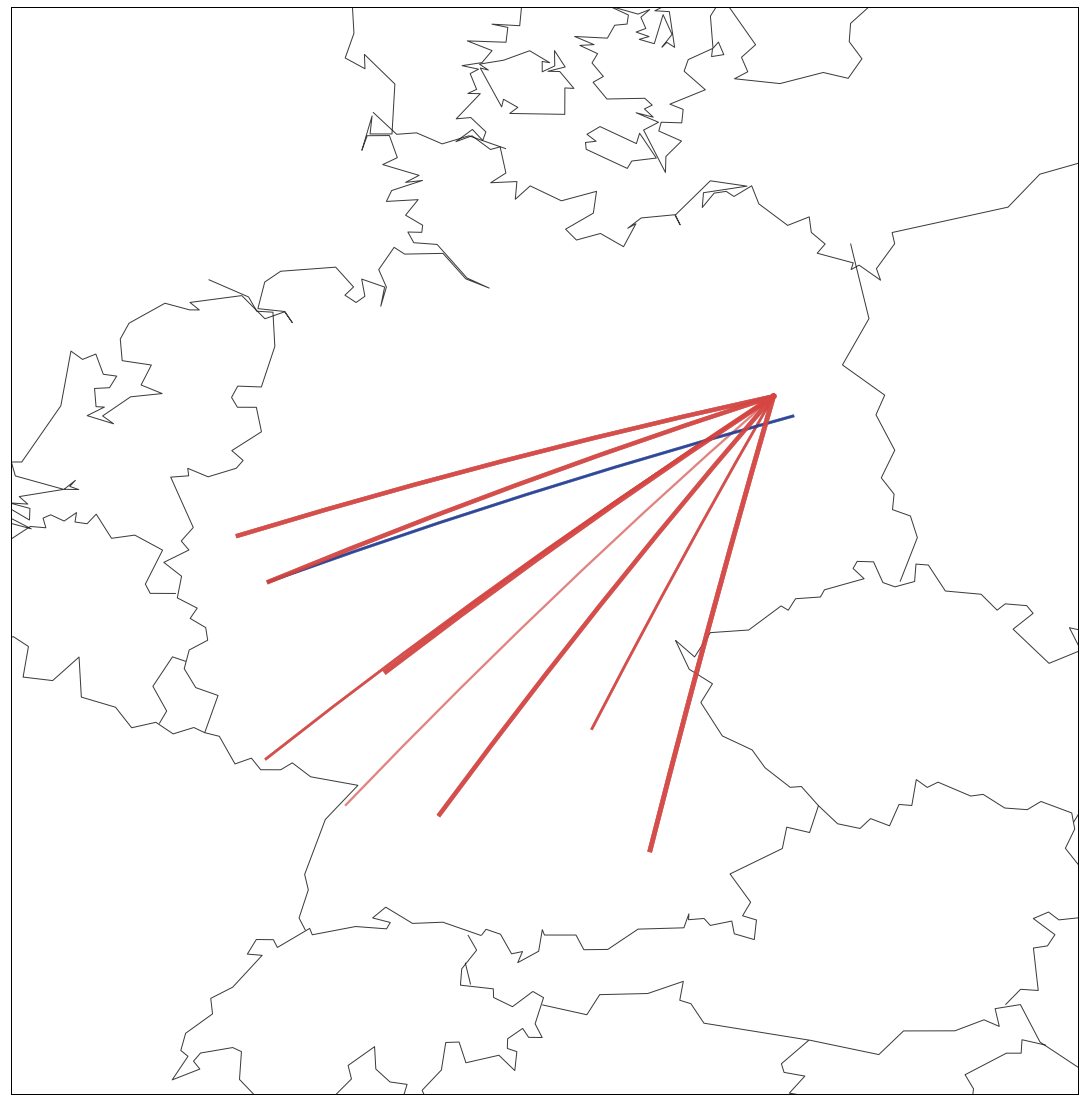

In [163]:
# df_map = df_2[(pd.to_datetime(df_2.month).dt.year == 2018) & (pd.to_datetime(df_2.month).dt.month == 8)]
# df_map = df_bln[(pd.to_datetime(df_bln.month).dt.year == 2018)].dropna()  # & df_bln['domestic'] == 1].dropna()
df_map = df_bln[(pd.to_datetime(df_bln.month).dt.year == 2018)& df_bln['domestic'] == 1].dropna()

# df_map = df_map.head(300)

color_mode = 'xx' # 'screen'

if color_mode == 'screen':
    bg_color = (0.0, 0.0, 0, 1.0)
    coast_color = (204/255.0, 0, 153/255.0, 0.7)
    color_list = [(0.0, 0.0, 0.0, 0.0),
                  (204/255.0, 0, 153/255.0, 0.6),
                  (255/255.0, 204/255.0, 230/255.0, 1.0)]
else:
    bg_color = (1.0, 1.0, 1.0, 1.0)
    coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
    color_list = [(1.0, 1.0, 1.0, 0.0),
                  (255/255.0, 204/255.0, 230/255.0, 1.0),
                  (204/255.0, 0, 153/255.0, 0.6)
                  ]

num_routes = len(df_map.index)

# normalize the dataset for color scale
norm = PowerNorm(0.3, df_map['flight_d'].min(),
                 df_map['flight_d'].max())
# norm = Normalize(routes['nb_flights'].min(), routes['nb_flights'].max())

# create a linear color scale with enough colors

absolute = False

if absolute:
    n = df_map['flight_d'].max()
else:
    n = num_routes
cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,
                                         N=n)
# create the map and draw country boundaries
plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=5, lat_0=35, resolution='l')  # lat_0=10, lon_0=0, 
m.drawcoastlines(color=coast_color, linewidth=1.0)
m.drawcountries(color=coast_color, linewidth=1.0)
m.fillcontinents(color=bg_color, lake_color=bg_color)
m.drawmapboundary(fill_color=bg_color)

# plot each route with its color depending on the number of flights
for i, df_map in enumerate(df_map.sort_values(by='flight_d',
                          ascending=True).iterrows()):
    df_map = df_map[1]
    if absolute:
        color = cmap(norm(int(df_map['flight_d'])))
    else:
        # color = cmap(i * 1.0 / num_routes)
        if df_map['airport'] == 'Berlin-Schönefeld':
            color = (31/255, 58/255, 147/255, 1/255) # col.to_rgba('blue')
        else:
            color = (214/255, 69/255, 65/255, 1/255) # col.to_rgba(150, 40, 27, 1) # col.to_rgba('red')
        # color = [(255, 0, 0, 0.8) if df_map['airport'] == 'Berlin-Schönefeld' else (255, 0, 0, 0.4)]
        
    line, = m.drawgreatcircle(df_map['fr_lng'], df_map['fr_lat'],
                              df_map['to_lng'], df_map['to_lat'],
                              linewidth= 5* norm(int(df_map['flight_d'])), color=color, alpha=0.1)
    # if the path wraps the image, basemap plots a nasty line connecting
    # the points at the opposite border of the map.
    # we thus detect path that are bigger than 30km and split them
    # by adding a NaN
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
        

        # your extent in lat/lon (dec degrees)
# ulx = -15
# uly = 75
# lrx = 55
# lry = 20

# Europe
# ulx = -20
# uly = 60
# lrx = 50
# lry = 20

# DE
ulx = 4
uly = 56
lrx = 17
lry = 46

# ulx = -20
# uly = 60
# lrx = 50
# lry = 20

# ulx = -10
# uly = 55
# lrx = 55
# lry = 20

# transform coordinates to map projection
xmin, ymin = m(ulx, lry)
xmax, ymax = m(lrx, uly)

# set the axes limits
ax = plt.gca();
ax.set_xlim(xmin, xmax);
ax.set_ylim(ymin, ymax);

# save the map
plt.savefig('../plots/map_germany.png', format='png', bbox_inches='tight')

/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater


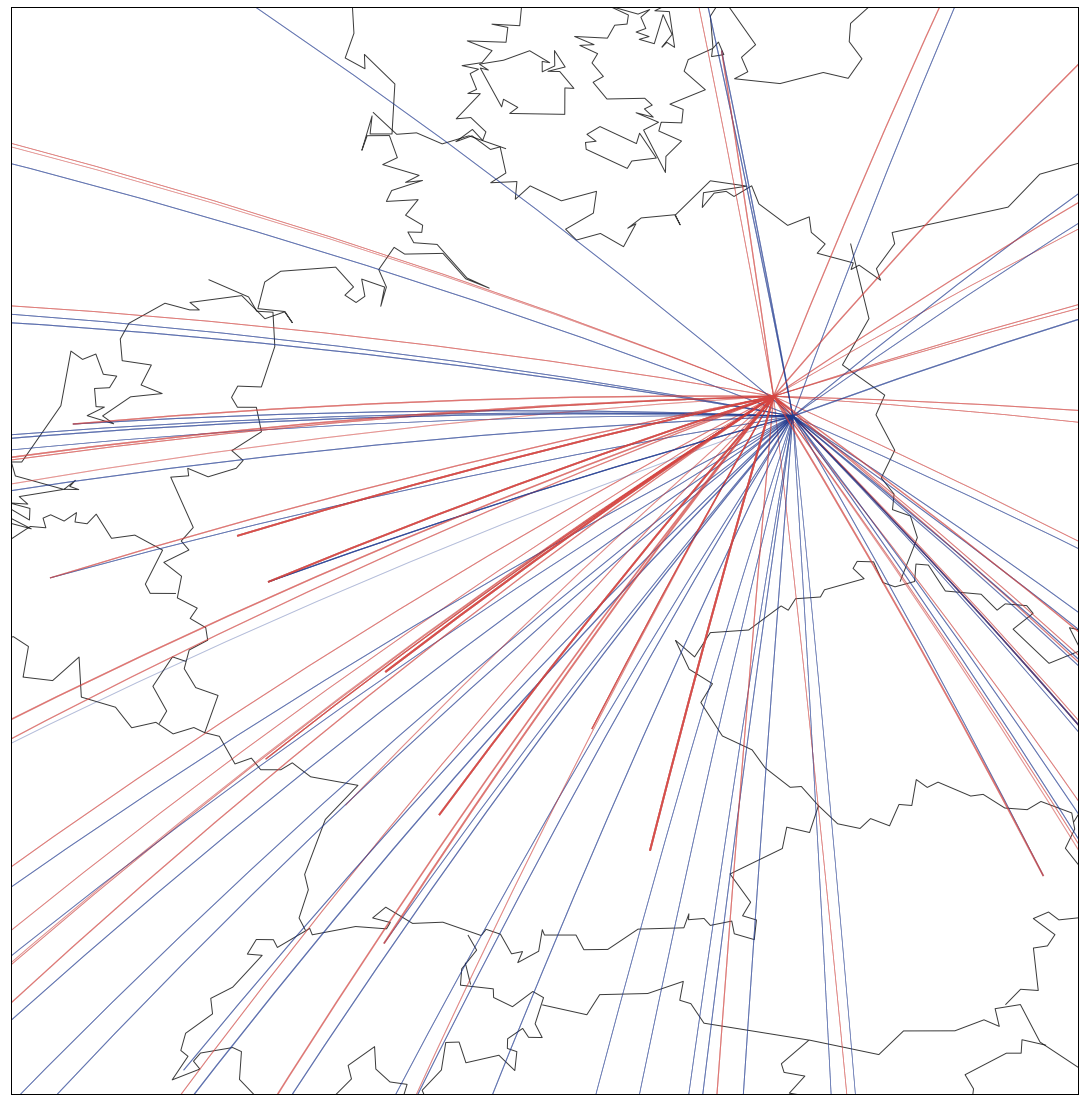

In [166]:
# df_map = df_2[(pd.to_datetime(df_2.month).dt.year == 2018) & (pd.to_datetime(df_2.month).dt.month == 8)]
# df_map = df_bln[(pd.to_datetime(df_bln.month).dt.year == 2018)].dropna()  # & df_bln['domestic'] == 1].dropna()
df_map = df_bln[(pd.to_datetime(df_bln.month).dt.year == 2018)].dropna()

# df_map = df_map.head(300)

color_mode = 'xx' # 'screen'

if color_mode == 'screen':
    bg_color = (0.0, 0.0, 0, 1.0)
    coast_color = (204/255.0, 0, 153/255.0, 0.7)
    color_list = [(0.0, 0.0, 0.0, 0.0),
                  (204/255.0, 0, 153/255.0, 0.6),
                  (255/255.0, 204/255.0, 230/255.0, 1.0)]
else:
    bg_color = (1.0, 1.0, 1.0, 1.0)
    coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
    color_list = [(1.0, 1.0, 1.0, 0.0),
                  (255/255.0, 204/255.0, 230/255.0, 1.0),
                  (204/255.0, 0, 153/255.0, 0.6)
                  ]

num_routes = len(df_map.index)

# normalize the dataset for color scale
norm = PowerNorm(0.3, df_map['flight_d'].min(),
                 df_map['flight_d'].max())
# norm = Normalize(routes['nb_flights'].min(), routes['nb_flights'].max())

# create a linear color scale with enough colors

absolute = False

if absolute:
    n = df_map['flight_d'].max()
else:
    n = num_routes
cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,
                                         N=n)
# create the map and draw country boundaries
plt.figure(figsize=(27, 20))
m = Basemap(projection='mill', lon_0=5, lat_0=35, resolution='l')  # lat_0=10, lon_0=0, 
m.drawcoastlines(color=coast_color, linewidth=1.0)
m.drawcountries(color=coast_color, linewidth=1.0)
m.fillcontinents(color=bg_color, lake_color=bg_color)
m.drawmapboundary(fill_color=bg_color)

# plot each route with its color depending on the number of flights
for i, df_map in enumerate(df_map.sort_values(by='flight_d',
                          ascending=True).iterrows()):
    df_map = df_map[1]
    if absolute:
        color = cmap(norm(int(df_map['flight_d'])))
    else:
        # color = cmap(i * 1.0 / num_routes)
        if df_map['airport'] == 'Berlin-Schönefeld':
            color = (31/255, 58/255, 147/255, 1/255) # col.to_rgba('blue')
        else:
            color = (214/255, 69/255, 65/255, 1/255) # col.to_rgba(150, 40, 27, 1) # col.to_rgba('red')
        # color = [(255, 0, 0, 0.8) if df_map['airport'] == 'Berlin-Schönefeld' else (255, 0, 0, 0.4)]
        
    line, = m.drawgreatcircle(df_map['fr_lng'], df_map['fr_lat'],
                              df_map['to_lng'], df_map['to_lat'],
                              linewidth= 2* norm(int(df_map['flight_d'])), color=color, alpha=0.1)
    # if the path wraps the image, basemap plots a nasty line connecting
    # the points at the opposite border of the map.
    # we thus detect path that are bigger than 30km and split them
    # by adding a NaN
    path = line.get_path()
    cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
    if len(cut_point) > 0:
        cut_point = cut_point[0]
        vertices = np.concatenate([path.vertices[:cut_point, :],
                                  [[np.nan, np.nan]],
                                  path.vertices[cut_point+1:, :]])
        path.codes = None  # treat vertices as a serie of line segments
        path.vertices = vertices
        

        # your extent in lat/lon (dec degrees)
# ulx = -15
# uly = 75
# lrx = 55
# lry = 20

# Europe
# ulx = -20
# uly = 60
# lrx = 50
# lry = 20

# DE
ulx = 4
uly = 56
lrx = 17
lry = 46

# ulx = -20
# uly = 60
# lrx = 50
# lry = 20

# ulx = -10
# uly = 55
# lrx = 55
# lry = 20

# transform coordinates to map projection
xmin, ymin = m(ulx, lry)
xmax, ymax = m(lrx, uly)

# set the axes limits
ax = plt.gca();
ax.set_xlim(xmin, xmax);
ax.set_ylim(ymin, ymax);

# save the map
plt.savefig('../plots/map_germany_all_flights.png', format='png', bbox_inches='tight')